In [12]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import time

In [13]:
experiments = glob.glob("C:/Users/hzwaan/Documents/serverlessgraphs/timestamps/prometheus/*")

FORM = "%H:%M:%S.%f"
PARAMETERS = ["lpid", "lpps", "rpid", "rpps", "spps"]
FULL_PARAMETR_NAME = { "lpid": "livenessProbeInitialDelay", 
                       "lpps": "livenessProbePeriodSeconds", 
                       "rpid": "readinessProbeInitialDelay", 
                       "rpps": "readinessProbePeriodSeconds", 
                       "spps": "startupProbe.periodSeconds"}

C:/Users/hzwaan/Documents/serverlessgraphs/timestamps/prometheus\combined.png
[Errno 2] No such file or directory: 'C:/Users/hzwaan/Documents/serverlessgraphs/timestamps/prometheus\\combined.png/clean_df.csv'
C:/Users/hzwaan/Documents/serverlessgraphs/timestamps/prometheus\comparison
[Errno 2] No such file or directory: 'C:/Users/hzwaan/Documents/serverlessgraphs/timestamps/prometheus\\comparison/clean_df.csv'
C:/Users/hzwaan/Documents/serverlessgraphs/timestamps/prometheus\comp_lpid.csv
[Errno 2] No such file or directory: 'C:/Users/hzwaan/Documents/serverlessgraphs/timestamps/prometheus\\comp_lpid.csv/clean_df.csv'
C:/Users/hzwaan/Documents/serverlessgraphs/timestamps/prometheus\comp_lpps.csv
[Errno 2] No such file or directory: 'C:/Users/hzwaan/Documents/serverlessgraphs/timestamps/prometheus\\comp_lpps.csv/clean_df.csv'
C:/Users/hzwaan/Documents/serverlessgraphs/timestamps/prometheus\comp_rpid.csv
[Errno 2] No such file or directory: 'C:/Users/hzwaan/Documents/serverlessgraphs/time

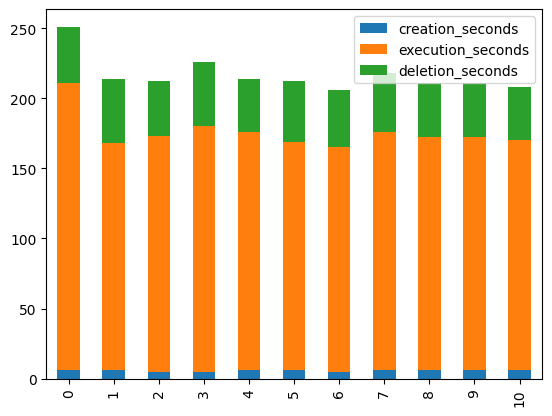

In [14]:
for experiment in experiments:
    try:
        identifier = experiment.split('\\')[1].replace("_", " ")
        # Data prep
        df = pd.read_csv(f"{experiment}/clean_df.csv")
        df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

        columns_to_update = ["creation", "execution", "deletion", "tpstart", "tpdataframe", "tpfinished"]
        for _ in columns_to_update:
            updated_values = []
            for row in df[_]:
                h,m,s = row.split(":")
                s = s.split(".")[0]
                total_s = (int(h) * 3600) + (int(m) * 60) + int(s)
                updated_values.append(total_s)
            df[f"{_}_seconds"] = updated_values

        df['total'] = df["creation_seconds"] + df["execution_seconds"]  + df["deletion_seconds"]
        df["exp"] = identifier
        df["execution_remainder"] = df["execution_seconds"] - df["tpstart_seconds"] - df["tpdataframe_seconds"] - df["tpfinished_seconds"]


        # Plotting
        selected_columns = ["creation_seconds", "execution_seconds", "deletion_seconds"]
        overall = df[selected_columns]
        ax = overall.plot(kind="bar", stacked=True)

        # Add Title and Labels
        plt.title(f"Monitoring execution time in seconds of {identifier}")
        plt.xlabel("Run ID")
        plt.ylabel("Time (s)")
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles[::-1], labels[::-1], loc=(1.015,0.6))
        plt.tight_layout()
        for i, item in enumerate(reversed(ax.containers)):
            # c = "black" if i == 0 else "white"
            if i == 0:
                ax.bar_label(item, color="black", weight="bold")

        plt.tight_layout()    
        plt.savefig(f"{experiment}/total_execution.png")
        plt.close()

        selected_columns_tp = ["tpstart_seconds", "tpdataframe_seconds", "tpfinished_seconds"]
        tp = df[selected_columns_tp]
        ax2 = tp.plot(kind="bar", stacked=True)

        # Add Title and Labels
        plt.title(f"Tenant execution time in seconds of {identifier}")
        plt.xlabel("Run ID")
        plt.ylabel("Time (s)")

        for i, item in enumerate(reversed(ax2.containers)):
            # c = "black" if i == 0 else "white"
            if i == 0:
                ax2.bar_label(item, color="black", weight="bold")
        plt.tight_layout()
        handles, labels = ax2.get_legend_handles_labels()
        ax2.legend(handles[::-1], labels[::-1], loc=(1.015,0.6))
        plt.tight_layout()
        plt.savefig(f"{experiment}/tenant_program.png")
        plt.close()

        selected_combined = ["creation_seconds", "tpstart_seconds", "tpdataframe_seconds", "tpfinished_seconds", "execution_remainder", "deletion_seconds"]
        combined = df[selected_combined]

        ax3 = combined.plot(kind="bar", stacked=True, legend=False)
        # Add Title and Labels
        plt.title(f"Total execution time in seconds of {identifier}")
        plt.xlabel("Run ID")
        plt.ylabel("Time (s)")
        for i, item in enumerate(reversed(ax3.containers)):
            if i == 0:
                ax3.bar_label(item, color="black", weight="bold")
        handles, labels = ax3.get_legend_handles_labels()
        ax3.legend(handles[::-1], labels[::-1], loc=(1.015,0.6))
        plt.tight_layout()
        plt.savefig(f"{experiment}/combined.png")
        plt.close()

        ax3 = df.boxplot(column="total", rot=90, by="exp")
        # # Add Title and Labels
        plt.title(f"Boxplot of {identifier}")
        plt.xlabel("experiments")
        plt.suptitle('')
        plt.ylabel("Time (s)")
        plt.tight_layout()

        plt.tight_layout()
        plt.savefig(f"{experiment}/boxplot.png")
        plt.close()
    except Exception as e:
        print(experiment)
        print(e)

In [15]:
experiment = "C:/Users/hzwaan/Documents/serverlessgraphs/timestamps/prometheus\\final_settings"
identifier = experiment.split('\\')[1].replace("_", " ")
# Data prep
df = pd.read_csv(f"{experiment}/clean_df.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

columns_to_update = ["creation", "execution", "deletion", "tpstart", "tpdataframe", "tpfinished"]
for _ in columns_to_update:
    updated_values = []
    for row in df[_]:
        h,m,s = row.split(":")
        s = s.split(".")[0]
        total_s = (int(h) * 3600) + (int(m) * 60) + int(s)
        updated_values.append(total_s)
    df[f"{_}_seconds"] = updated_values

df["execution_remainder"] = df["execution_seconds"] - df["tpstart_seconds"] - df["tpdataframe_seconds"] - df["tpfinished_seconds"]


# Plotting
selected_columns = ["creation_seconds", "execution_seconds", "deletion_seconds"]
overall = df[selected_columns]
ax = overall.plot(kind="bar", stacked=True)

# Add Title and Labels
plt.title(f"Monitoring execution time in seconds of {identifier}")
plt.xlabel("Run ID")
plt.ylabel("Time (s)")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc=(1.015,0.6))
plt.tight_layout()
# ax.legend(bbox_to_anchor=(1.0, 1.0))
for i, item in enumerate(reversed(ax.containers)):
    # c = "black" if i == 0 else "white"
    if i == 0:
        ax.bar_label(item, color="black", weight="bold", rotation=90, padding=2)
plt.ylim([0, 280])
plt.tight_layout()    
plt.savefig(f"{experiment}/total_execution.png")
plt.close()

selected_columns_tp = ["tpstart_seconds", "tpdataframe_seconds", "tpfinished_seconds"]
tp = df[selected_columns_tp]
ax2 = tp.plot(kind="bar", stacked=True)

# Add Title and Labels
plt.title(f"Tenant execution time in seconds of {identifier}")
plt.xlabel("Run ID")
plt.ylabel("Time (s)")

for i, item in enumerate(reversed(ax2.containers)):
    # c = "black" if i == 0 else "white"
    if i == 0:
        ax2.bar_label(item, color="black", weight="bold", rotation=90, padding=2)
plt.ylim([0, 230])
plt.tight_layout()
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles[::-1], labels[::-1], loc=(1.015,0.6))
plt.tight_layout()
plt.savefig(f"{experiment}/tenant_program.png")
plt.close()

selected_combined = ["creation_seconds", "tpstart_seconds", "tpdataframe_seconds", "tpfinished_seconds", "execution_remainder", "deletion_seconds"]
combined = df[selected_combined]

ax3 = combined.plot(kind="bar", stacked=True, legend=False)
# Add Title and Labels
plt.title(f"Total execution time in seconds of {identifier}")
plt.xlabel("Run ID")
plt.ylabel("Time (s)")
for i, item in enumerate(reversed(ax3.containers)):
    if i == 0:
        ax3.bar_label(item, color="black", weight="bold", rotation=90, padding=2)
plt.ylim([0, 280])
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles[::-1], labels[::-1], loc=(1.015,0.6))
plt.tight_layout()
plt.savefig(f"{experiment}/combined.png")
plt.close()

ax4 = combined.boxplot(column=selected_combined, rot=90)
# # Add Title and Labels
plt.title(f"Boxplot of {identifier}")
plt.xlabel("Part of total execution")
plt.ylabel("Time (s)")
plt.tight_layout()

plt.tight_layout()
plt.savefig(f"{experiment}/boxplot.png")
plt.close()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/hzwaan/Documents/serverlessgraphs/timestamps/benchmark_runs\\final_settings/clean_df.csv'

In [ ]:
df.describe()

creation_seconds  execution_seconds  deletion_seconds  tpstart_seconds  \
count         20.000000          20.000000         20.000000        20.000000   
mean           5.950000         165.950000         40.250000        11.350000   
std            0.223607          12.124247          2.244877        10.737416   
min            5.000000         156.000000         38.000000         7.000000   
25%            6.000000         160.750000         39.000000         7.000000   
50%            6.000000         163.000000         40.000000         8.000000   
75%            6.000000         165.500000         40.000000         9.250000   
max            6.000000         214.000000         45.000000        55.000000   

       tpdataframe_seconds  tpfinished_seconds  execution_remainder  
count             20.00000           20.000000            20.000000  
mean             103.85000           49.250000             1.500000  
std                0.74516            1.996708             0.606977  
min              103.00000           44.000000             0.000000  
25%              103.00000           48.750000             1.000000  
50%              104.00000           49.500000             2.000000  
75%              104.00000           50.000000             2.000000  
max              105.00000           53.000000             2.000000